In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
df.shape

(240, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [7]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Radius(R/Ro)'>

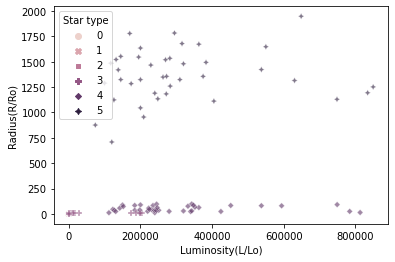

In [14]:
sns.scatterplot(data = df, x = 'Luminosity(L/Lo)', y = 'Radius(R/Ro)', hue = 'Star type', alpha = 0.6, style = 'Star type')
# plt.xlim(0, 400000)
# plt.ylim(0, 200)

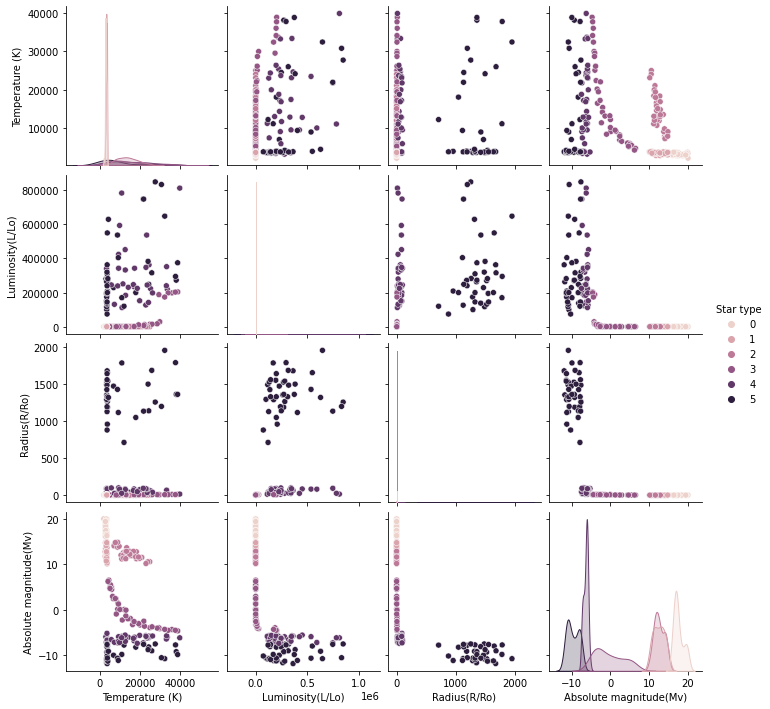

In [15]:
sns.pairplot(data = df, hue = 'Star type')

In [23]:
from sklearn.preprocessing import LabelEncoder 

In [24]:
label = LabelEncoder()

In [25]:
df['Star color'] = label.fit_transform(df['Star color'])
df['Spectral Class'] = label.fit_transform(df['Spectral Class'])

In [26]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


In [27]:
X = df.drop('Star type', axis = 1)

In [28]:
y = df['Star type']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=1)

In [37]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
predict = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [40]:
confusion_matrix(y_test, predict)

array([[13,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  1,  1, 15,  0,  0],
       [ 0,  0,  0,  1,  6,  0],
       [ 0,  0,  0,  1,  0, 14]], dtype=int64)

In [41]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       0.92      1.00      0.96        12
           3       0.88      0.88      0.88        17
           4       1.00      0.86      0.92         7
           5       1.00      0.93      0.97        15

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



In [43]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [44]:
accuracy_score(y_test, predict)

0.9444444444444444

In [46]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, predict)
    
    test_error_rates.append(test_error)

In [47]:
test_error_rates

[0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558,
 0.05555555555555558]

Text(0.5, 0, 'K Neighbors')

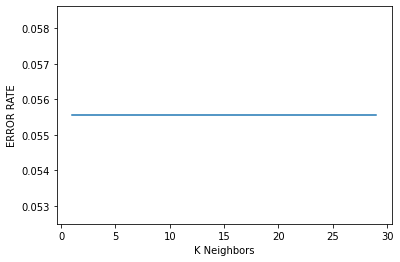

In [48]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [49]:
# PIPELINE -----> GRIDSEARCH CV

In [50]:
scaler = StandardScaler()

In [51]:
knn = KNeighborsClassifier()

In [54]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [55]:
operations = [('scaler', scaler), ('knn', knn)]

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline(operations)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
k_values = list(range(1,20))

In [60]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [62]:
param_grid = {'knn__n_neighbors': k_values}

In [63]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv =5, scoring = 'accuracy')

In [64]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [67]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [69]:
full_predict = full_cv_classifier.predict(X_test)

In [70]:
print(classification_report(y_test, full_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       0.92      1.00      0.96        12
           3       0.88      0.88      0.88        17
           4       1.00      0.86      0.92         7
           5       1.00      0.93      0.97        15

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



In [73]:
new_star = [[3.87, 6.4, 2.6, 4.2, 3.8, 1.8]]

In [74]:
full_cv_classifier.predict(new_star)

array([5], dtype=int64)

In [76]:
full_cv_classifier.predict_proba(new_star)

array([[0., 0., 0., 0., 0., 1.]])